# Tarea 2

## Ejercicio 1

El procedimeinto usado para calcular el SNR de las señales es a partir de la relación entre la amplitud de pico a pico de la señal y del ruido. El procedimiento es el propuesto en [1]

In [2]:
import scipy.io
import numpy as np
from numpy import ptp, zeros, mean
import biosignalsnotebooks as bsnb
from math import log10
import matplotlib.pyplot as plt
from scipy import interpolate
from math import log

Cargamos las señales

In [9]:
limpio = scipy.io.loadmat('ecg_limpio.mat')['ecg_limpio'].reshape(245000)
snr1 = scipy.io.loadmat('ECG_snr1.mat')['ECG_snr1'].reshape(245000)
snr2 = scipy.io.loadmat('ECG_snr2.mat')['ECG_snr2'].reshape(245000)
snr3 = scipy.io.loadmat('ECG_snr3.mat')['ECG_snr3'].reshape(245000)
snr4 = scipy.io.loadmat('ECG_snr4.mat')['ECG_snr4'].reshape(245000)

<class 'numpy.ndarray'>


Conseguimos las amplitudes de pico a pico

In [4]:
vpp_limpio= ptp(limpio)
vpp_snr1=ptp(snr1)
vpp_snr2=ptp(snr2)
vpp_snr3=ptp(snr3)
vpp_snr4=ptp(snr4)

Buscamos los picos R

In [5]:
sampling_rate = 1000
time_r_peaks_limpio, amplitude_r_peaks_limpio = bsnb.detect_r_peaks(limpio, sampling_rate, time_units=True, plot_result=False)
time_r_peaks_snr1, amplitude_r_peaks_snr1 = bsnb.detect_r_peaks(snr1, sampling_rate, time_units=True, plot_result=False)
time_r_peaks_snr2, amplitude_r_peaks_snr2 = bsnb.detect_r_peaks(snr2, sampling_rate, time_units=True, plot_result=False)
time_r_peaks_snr3, amplitude_r_peaks_snr3 = bsnb.detect_r_peaks(snr3, sampling_rate, time_units=True, plot_result=False)
time_r_peaks_snr4, amplitude_r_peaks_snr4 = bsnb.detect_r_peaks(snr4, sampling_rate, time_units=True, plot_result=False)

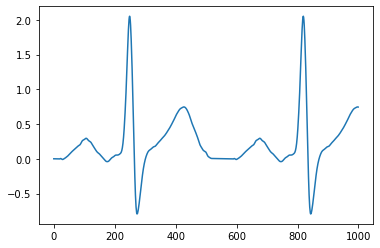

In [6]:
plt.plot(limpio[0:1000])

Conseguimos la amplitud del ruido a partir del intervalo entre cada latido. El razonamiento es que mientras más limpia está la señal, la amplitud en este segmento es menor mientras menos sea el ruido

In [90]:
vpp_noise_limpio = []

for t in time_r_peaks_limpio:
    start = int((t + 0.37) * sampling_rate)
    end = int((t + 0.45)* sampling_rate) 
    interval = limpio[start:end]
    vpp = ptp(interval)
    vpp_noise_limpio.append(vpp)
    
vpp_noise_limpio_mean = mean(vpp_noise_limpio)


vpp_noise_snr1 = []

for t in time_r_peaks_snr1:
    start = int((t + 0.37) * sampling_rate)
    end = int((t + 0.45)* sampling_rate)
    interval = snr1[start:end]
    vpp = ptp(interval)
    vpp_noise_snr1.append(vpp)
    
vpp_noise_snr1_mean = mean(vpp_noise_snr1)


vpp_noise_snr2 = []

for t in time_r_peaks_snr2:
    start = int((t + 0.25) * sampling_rate)
    end = int((t + 0.50)* sampling_rate)
    interval = snr2[start:end]
    vpp = ptp(interval)
    vpp_noise_snr2.append(vpp)
    
vpp_noise_snr2_mean = mean(vpp_noise_snr2)


vpp_noise_snr3 = []

for t in time_r_peaks_snr3:
    start = int((t + 0.15) * sampling_rate)
    end = int((t + 0.55)* sampling_rate)
    interval = snr3[start:end]
    vpp = ptp(interval)
    vpp_noise_snr3.append(vpp)
    
vpp_noise_snr3_mean = mean(vpp_noise_snr3)


vpp_noise_snr4 = []

for t in time_r_peaks_snr4:
    start = int((t + 0.10) * sampling_rate)
    end = int((t + 0.567)* sampling_rate)
    interval = snr4[start:end]
    vpp = ptp(interval)
    vpp_noise_snr4.append(vpp)
    
vpp_noise_snr4_mean = mean(vpp_noise_snr4)

La amplitud de los ruidos

Calculamos el SNR

In [91]:
snr_ecg_db_limpio = 20 * log10(vpp_limpio/vpp_noise_limpio_mean)
snr_ecg_db_snr1 = 20 * log10(vpp_snr1/vpp_noise_snr1_mean)
snr_ecg_db_snr2 = 20 * log10(vpp_snr2/vpp_noise_snr2_mean)
snr_ecg_db_snr3 = 20 * log10(vpp_snr3/vpp_noise_snr3_mean)
snr_ecg_db_snr4 = 20 * log10(vpp_snr4/vpp_noise_snr4_mean)

In [92]:
print("SNR para la señal limpio: {} dB".format(snr_ecg_db_limpio))
print("SNR para la señal snr1: {} dB".format(snr_ecg_db_snr1))
print("SNR para la señal snr2: {} dB".format(snr_ecg_db_snr2))
print("SNR para la señal snr3: {} dB".format(snr_ecg_db_snr3))
print("SNR para la señal snr4: {} dB".format(snr_ecg_db_snr4))

SNR para la señal limpio: 21.15337876895188 dB
SNR para la señal snr1: 19.915218914247983 dB
SNR para la señal snr2: 16.451833355623236 dB
SNR para la señal snr3: 9.884029238121453 dB
SNR para la señal snr4: 5.520353042560517 dB


De acuerdo a [2]. Un SNR mayor a 0 representa que hay más señal que ruido. Además, un SNR superior a 10dB en la señal de ECG permite reconocer arritmias cardíacas con más de 96% de precisión 

2. Graficas de SNR en el tiempo

In [93]:
vpp_limpio_array = []

for t in time_r_peaks_limpio:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = limpio[start:end]
    vpp = ptp(interval)
    vpp_limpio_array.append(vpp)

    
vpp_snr1_array = []

for t in time_r_peaks_snr1:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = snr1[start:end]
    vpp = ptp(interval)
    vpp_snr1_array.append(vpp)
    
    
vpp_snr2_array = []

for t in time_r_peaks_snr2:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = snr2[start:end]
    vpp = ptp(interval)
    vpp_snr2_array.append(vpp)


vpp_snr3_array = []

for t in time_r_peaks_snr3:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = snr3[start:end]
    vpp = ptp(interval)
    vpp_snr3_array.append(vpp)
    
    
vpp_snr4_array = []

for t in time_r_peaks_snr4:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = snr4[start:end]
    vpp = ptp(interval)
    vpp_snr4_array.append(vpp)

In [94]:
snr_ecg_db_limpio_array = ([20 * log10(i / j) for i, j in zip(vpp_limpio_array, vpp_noise_limpio)])
snr_ecg_db_snr1_array = ([20 * log10(i / j) for i, j in zip(vpp_snr1_array, vpp_noise_snr1)])
snr_ecg_db_snr2_array = ([20 * log10(i / j) for i, j in zip(vpp_snr2_array, vpp_noise_snr2)])
snr_ecg_db_snr3_array = ([20 * log10(i / j) for i, j in zip(vpp_snr3_array, vpp_noise_snr3)])
snr_ecg_db_snr4_array = ([20 * log10(i / j) for i, j in zip(vpp_snr4_array, vpp_noise_snr4)])

In [133]:
snr_limpio_mean_array = [snr_ecg_db_limpio_array[0]]
for i in range(1,len(snr_ecg_db_limpio_array)):
    snr_limpio_mean_array.append(mean(snr_ecg_db_limpio_array[0:i]))
    
snr_snr1_mean_array = [snr_ecg_db_snr1_array[0]]
for i in range(1,len(snr_ecg_db_snr1_array)):
    snr_snr1_mean_array.append(mean(snr_ecg_db_snr1_array[0:i]))
    
snr_snr2_mean_array = [snr_ecg_db_snr2_array[0]]
for i in range(1,len(snr_ecg_db_snr2_array)):
    snr_snr2_mean_array.append(mean(snr_ecg_db_snr2_array[0:i]))
    
snr_snr3_mean_array = [snr_ecg_db_snr3_array[0]]
for i in range(1,len(snr_ecg_db_snr3_array)):
    snr_snr3_mean_array.append(mean(snr_ecg_db_snr3_array[0:i]))
    
snr_snr4_mean_array = [snr_ecg_db_snr4_array[0]]
for i in range(1,len(snr_ecg_db_snr4_array)):
    snr_snr4_mean_array.append(mean(snr_ecg_db_snr4_array[0:i]))

SNR en relación a las épocas

Text(0.5, 1.0, 'limpio')

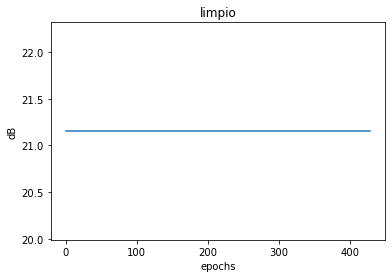

In [45]:
plt.plot(snr_limpio_mean_array)
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('limpio')

Text(0.5, 1.0, 'SNR1')

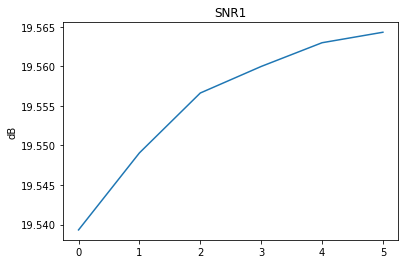

In [183]:
plt.plot(snr_snr1_mean_array[136:142])
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('SNR1')

Text(0.5, 1.0, 'SNR2')

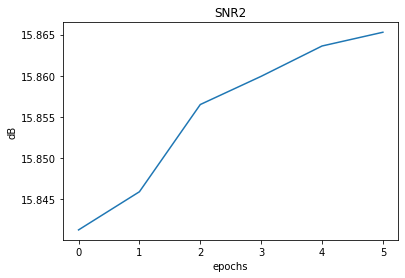

In [202]:
plt.plot(snr_snr2_mean_array[126:132])
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('SNR2')

Text(0.5, 1.0, 'SNR3')

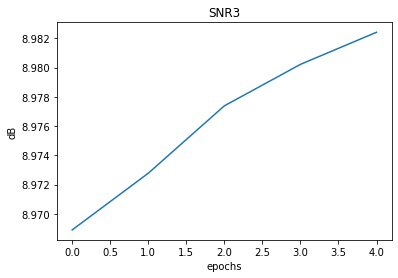

In [205]:
plt.plot(snr_snr3_mean_array[173:178])
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('SNR3')

Text(0.5, 1.0, 'SNR4')

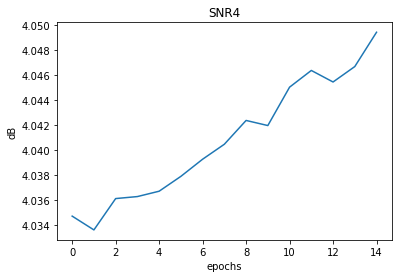

In [195]:
plt.plot(snr_snr4_mean_array[370:385])
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('SNR4')

Como se ve en las gráficas, el SRN tiende a subir con las épicas. No de una manera uniforme pero esto se puede deber a imperfecciones en el cálculo de la amplitud del ruido

3. Graficar el latido promedio

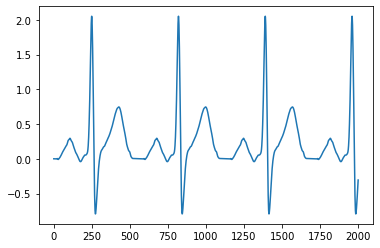

In [51]:
plt.plot(limpio[0:2000])

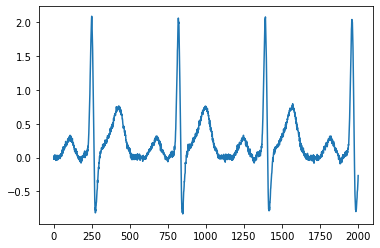

In [50]:
plt.plot(snr1[0:2000])

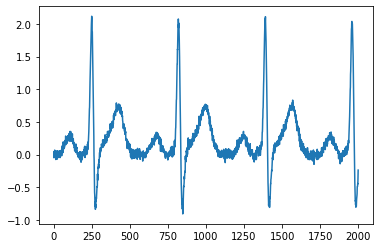

In [52]:
plt.plot(snr2[0:2000])

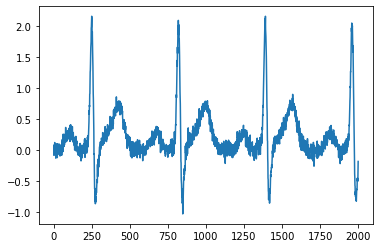

In [53]:
plt.plot(snr3[0:2000])

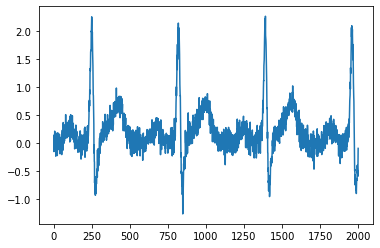

In [54]:
plt.plot(snr4[0:2000])

En general, como se comentaba más arriba en los resultados de los SNR promediados. En ninguno de los casos se deja de identificar los distintos segmentos del ECG y ya que inclusive SNR4 tiene un SNR por encima de 10, un experto podría identificar distintas situaciones como arritmias sin mayores problemas.

## Ejercicio 2

In [10]:
ECG59  = np.genfromtxt('ECG59.csv', delimiter=',')
ECG2039 = np.genfromtxt('ECG2039.csv', delimiter=',')

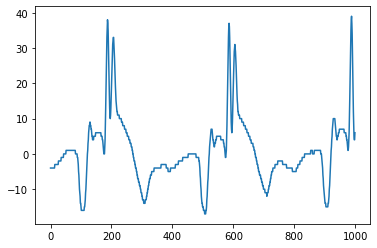

In [16]:
plt.plot(ECG59[0][0:1000])

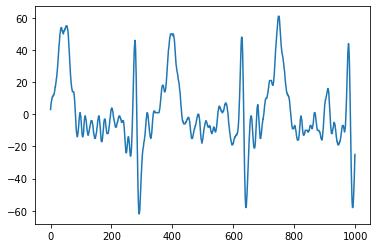

In [17]:
plt.plot(ECG2039[0][0:1000])

In [20]:
sampling_rate = 400
time_r_peaks_ECG59, amplitude_r_peaks_ECG59 = bsnb.detect_r_peaks(ECG59[0], sampling_rate, time_units=True, plot_result=False)
time_r_peaks_ECG2039, amplitude_r_peaks_ECG2039 = bsnb.detect_r_peaks(ECG2039[0], sampling_rate, time_units=True, plot_result=False)
vpp_ECG59= ptp(ECG59[0])
vpp_ECG2039=ptp(ECG2039[0])

In [37]:
vpp_noise_ECG59 = []

for t in time_r_peaks_ECG59:
    start = int((t + 0.10) * sampling_rate)
    end = int((t + 0.30)* sampling_rate) 
    interval = ECG59[0][start:end]
    vpp = ptp(interval)
    vpp_noise_ECG59.append(vpp)
    
vpp_noise_ECG59_mean = mean(vpp_noise_ECG59)


vpp_noise_ECG2039 = []

for t in time_r_peaks_ECG2039:
    start = int((t + 0.10) * sampling_rate)
    end = int((t + 0.30)* sampling_rate)
    interval = ECG2039[0][start:end]
    vpp = ptp(interval)
    vpp_noise_ECG2039.append(vpp)
    
vpp_noise_ECG2039_mean = mean(vpp_noise_ECG2039)


In [38]:
snr_ecg_db_ECG59 = 20 * log10(vpp_ECG59/vpp_noise_ECG59_mean)
snr_ecg_db_ECG2039 = 20 * log10(vpp_ECG2039/vpp_noise_ECG2039_mean)

In [39]:
print('SNR para ECG59', snr_ecg_db_ECG59)
print('SNR para ECG2039', snr_ecg_db_ECG2039)

SNR para ECG59 25.06973133977114
SNR para ECG2039 20.075068908934668


ECG59 es la señal que tiene mejor SNR.

In [48]:
vrmsECG59 = 0.353*vpp_ECG59

### Agregando ruido blanco = rms

In [75]:
noise_1 = np.random.normal(0, vrmsECG59, len(ECG59[0]))
noise_signal_1 = ECG59[0] + noise_1
time_r_peaks_noise_1, amplitude_r_peaks_noise_1 = bsnb.detect_r_peaks(noise_signal_1, sampling_rate, time_units=True, plot_result=False)
vpp_noise_1 = ptp(noise_1)


vpp_noise_noise_1 = []

for t in time_r_peaks_noise_1:
    start = int((t + 0.10) * sampling_rate)
    end = int((t + 0.30)* sampling_rate) 
    interval = noise_1[start:end]
    vpp = ptp(interval)
    vpp_noise_noise_1.append(vpp)
    
vpp_noise_noise_1_mean = mean(vpp_noise_noise_1)

snr_ecg_db_noise_1 = 20 * log10(vpp_noise_1/vpp_noise_noise_1_mean)

print('SNR with noise = rms',snr_ecg_db_noise_1)

SNR with noise = rms 5.783876893893732


In [80]:
noise_2 = np.random.normal(0, vrmsECG59/2, len(ECG59[0]))
noise_signal_2 = ECG59[0] + noise_2
time_r_peaks_noise_2, amplitude_r_peaks_noise_2 = bsnb.detect_r_peaks(noise_signal_2, sampling_rate, time_units=True, plot_result=False)
vpp_noise_2 = ptp(noise_2)


vpp_noise_noise_2 = []

for t in time_r_peaks_noise_2:
    start = int((t + 0.10) * sampling_rate)
    end = int((t + 0.30)* sampling_rate) 
    interval = noise_2[start:end]
    vpp = ptp(interval)
    vpp_noise_noise_2.append(vpp)
    
vpp_noise_noise_2_mean = mean(vpp_noise_noise_2)

snr_ecg_db_noise_2 = 20 * log10(vpp_noise_2/vpp_noise_noise_2_mean)

print('SNR with noise = rms/2: ',snr_ecg_db_noise_2)

SNR with noise = rms/2:  6.025004760715111


In [107]:
noise_3 = np.random.normal(0, vrmsECG59/10, len(ECG59[0]))
noise_signal_3 = ECG59[0] + noise_3
time_r_peaks_noise_3, amplitude_r_peaks_noise_3 = bsnb.detect_r_peaks(noise_signal_3, sampling_rate, time_units=True, plot_result=False)
vpp_noise_3 = ptp(noise_3)


vpp_noise_noise_3 = []

for t in time_r_peaks_noise_3:
    start = int((t + 0.10) * sampling_rate)
    end = int((t + 0.30)* sampling_rate) 
    interval = noise_3[start:end]
    vpp = ptp(interval)
    vpp_noise_noise_3.append(vpp)
    
vpp_noise_noise_3_mean = mean(vpp_noise_noise_3)

snr_ecg_db_noise_3 = 20 * log10(vpp_noise_3/vpp_noise_noise_3_mean)

print('SNR with noise = rms/10: ',snr_ecg_db_noise_3)

SNR with noise = rms/10:  6.450899796251823


Al introducir ruido, el SNR baja considerablemente, en este caso mientras más amplio sea el ruido blanco, más opaca la señal original.

## Bibliografía

1. https://biosignalsplux.com/learn/notebooks/Categories/Pre-Process/snr_ECG_rev.php

2. Prasad, G. Krishna, and J. S. Sahambi. "Classification of ECG arrhythmias using multi-resolution analysis and neural networks." TENCON 2003. Conference on convergent technologies for Asia-Pacific region. Vol. 1. IEEE, 2003.
